In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd  #data analysis and loading etc
import numpy as np    #mathematical opperation on arrays
import os  # to deal with files
import math
import matplotlib.pyplot as plt #image handling
import matplotlib.image as mpimg
import shutil # move file from one folder to another
import sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

Creating 3 Important Lists --
data list for storing image data in numpy array form
paths list for storing paths of all images
result list for storing one hot encoded form of target class whether normal or tumor

In [ ]:
# This cell updates result list for images with tumor
from PIL import Image
data = []
paths = []
result = []



for r, d, f in os.walk('/content/drive/MyDrive/DATA/Tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk("/content/drive/MyDrive/DATA/Healthy"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(0,)

In [ ]:
result = np.array(result)
result = result.reshape(408,2)

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
len(x_train)

341

In [ ]:
len(x_test)

86

**CNN MODEL**

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
import keras

Tensor flow focus on training and inference of deep neural networks.

In [ ]:
from keras.layers.preprocessing.discretization import summarize
from keras.layers.attention.multi_head_attention import activation
from keras.layers.merging.add import add

from keras.engine.training import Model
#CNN MODEL

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

**MODEL TRAINING**

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
9/9 [==============================] - 10s 190ms/step - loss: 12.7150 - val_loss: 91.5279
Epoch 2/30
9/9 [==============================] - 1s 62ms/step - loss: 5.6222 - val_loss: 68.4317
Epoch 3/30
9/9 [==============================] - 1s 64ms/step - loss: 2.9787 - val_loss: 52.1252
Epoch 4/30
9/9 [==============================] - 1s 60ms/step - loss: 1.4854 - val_loss: 40.2144
Epoch 5/30
9/9 [==============================] - 1s 61ms/step - loss: 0.6862 - val_loss: 31.6624
Epoch 6/30
9/9 [==============================] - 1s 61ms/step - loss: 0.2959 - val_loss: 25.9782
Epoch 7/30
9/9 [==============================] - 1s 65ms/step - loss: 0.1492 - val_loss: 23.2146
Epoch 8/30
9/9 [==============================] - 1s 64ms/step - loss: 0.1664 - val_loss: 20.8398
Epoch 9/30
9/9 [==============================] - 1s 76ms/step - loss: 0.0842 - val_loss: 18.2346
Epoch 10/30
9/9 [==============================] - 1s 63ms/step - loss: 0.2140 - val_loss: 16.1859
Epoch 11/30
9/9 

**Graphical representation**

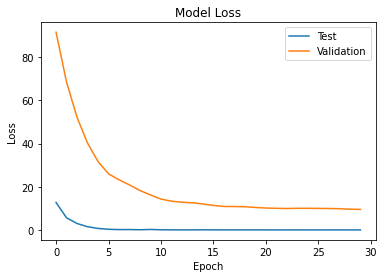

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

**Model Acuuracy**

In [ ]:
from keras_preprocessing.image import load_img, img_to_array

**PREDICTION**


In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is A Its a Tumor


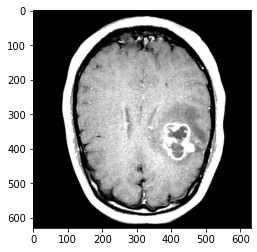

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/DATA/Tumor/y16.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
from sklearn.metrics import accuracy_score

res = [0, 2, 1, 3]
classification = [0, 1, 2, 3]
accuracy_score(res,classification)
accuracy_score(res, classification, normalize=False)


2